In [1]:
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pandas as pd
import seaborn as sns

In [2]:
save_plots = True

In [3]:
plot_dir = "./plots/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [4]:
sns.set_style("ticks")

In [5]:
sns.despine()

In [6]:
mpl.rcParams.update({
    'font.size': 16, 'axes.titlesize': 17, 'axes.labelsize': 15,
    'xtick.labelsize': 10, 'ytick.labelsize': 13,
    #'font.family': 'Lato', 
    'font.weight': 600,
    'axes.labelweight': 600, 'axes.titleweight': 600,
    'figure.autolayout': True,
    })

In [7]:
!ls -l '../../statistics.xls'

-rwxrwx---  1 1000  NETID\Domain Users  11503 Mar  3 12:28 ../../statistics.xls


In [8]:
df = pd.read_csv('../../statistics.xls', sep="\t")

In [9]:
df.head()

,sample,shortd,total_reads,total_reads_mapped,s.total_reads_mapped / s.total_reads,reads_mapped_to_rRNA,s.reads_mapped_to_rRNA / s.total_reads_mapped,reads_mapped_to_tRNA,s.reads_mapped_to_tRNA / s.total_reads_mapped,reads_mapped_to_CDS,s.reads_mapped_to_CDS / s.total_reads_mapped,reads_mapped_to_hypo,s.reads_mapped_to_hypo / s.total_reads_mapped,CDS_max_hits_per_kb,CDS_mean_hits_per_kb
0,LakWasM100_LOW12_2,LakWasM100_LOW12_2,49751684,36402439,0.7317,568151,0.0156,13301,0.0004,19281601,0.5297,1747581,0.0480,4392450,144.1740
1,LakWasM104_HOW12_2,LakWasM104_HOW12_2,44057367,40004440,0.9080,1199481,0.0300,16308,0.0004,21358502,0.5339,2552060,0.0638,1685880,160.1830
2,LakWasM105_HOW12_2,LakWasM105_HOW12_2,45238626,39941526,0.8829,3498624,0.0876,13137,0.0003,13091596,0.3278,1936590,0.0485,1357410,111.6500
3,LakWasM106_HOW12_2,LakWasM106_HOW12_2,41878161,13552702,0.3236,2838281,0.2094,2479,0.0002,4648171,0.3430,597351,0.0441,427542,27.4376
4,LakWasM109_LOW13_2,LakWasM109_LOW13_2,36236191,34764674,0.9594,321671,0.0093,5118,0.0001,9683358,0.2785,124209,0.0036,3223020,64.1973


In [10]:
df['ID'] = df.shortd.str.extract('[A-z]+([0-9]+_[LH]OW[0-9]+)')

In [11]:
df.head()

,sample,shortd,total_reads,total_reads_mapped,s.total_reads_mapped / s.total_reads,reads_mapped_to_rRNA,s.reads_mapped_to_rRNA / s.total_reads_mapped,reads_mapped_to_tRNA,s.reads_mapped_to_tRNA / s.total_reads_mapped,reads_mapped_to_CDS,s.reads_mapped_to_CDS / s.total_reads_mapped,reads_mapped_to_hypo,s.reads_mapped_to_hypo / s.total_reads_mapped,CDS_max_hits_per_kb,CDS_mean_hits_per_kb,ID
0,LakWasM100_LOW12_2,LakWasM100_LOW12_2,49751684,36402439,0.7317,568151,0.0156,13301,0.0004,19281601,0.5297,1747581,0.0480,4392450,144.1740,100_LOW12
1,LakWasM104_HOW12_2,LakWasM104_HOW12_2,44057367,40004440,0.9080,1199481,0.0300,16308,0.0004,21358502,0.5339,2552060,0.0638,1685880,160.1830,104_HOW12
2,LakWasM105_HOW12_2,LakWasM105_HOW12_2,45238626,39941526,0.8829,3498624,0.0876,13137,0.0003,13091596,0.3278,1936590,0.0485,1357410,111.6500,105_HOW12
3,LakWasM106_HOW12_2,LakWasM106_HOW12_2,41878161,13552702,0.3236,2838281,0.2094,2479,0.0002,4648171,0.3430,597351,0.0441,427542,27.4376,106_HOW12
4,LakWasM109_LOW13_2,LakWasM109_LOW13_2,36236191,34764674,0.9594,321671,0.0093,5118,0.0001,9683358,0.2785,124209,0.0036,3223020,64.1973,109_LOW13


In [12]:
!ls "../../sample_meta_info.tsv"

../../sample_meta_info.tsv


In [13]:
smi = pd.read_csv('../../sample_meta_info.tsv', sep = '\t')

In [14]:
smi.head()

,ID,oxygen,replicate,week,project
0,1_LOW4,low,1,4,1056013
1,13_LOW5,low,1,5,1056037
2,25_LOW6,low,1,6,1056061
3,37_LOW7,low,1,7,1056085
4,49_LOW8,low,1,8,1056109


## Merge on sample info so I can get at the names for plotting. 

In [15]:
df.shape

(82, 16)

In [16]:
pd.merge(smi, df).shape

(82, 20)

In [17]:
df = pd.merge(smi, df)

In [18]:
df.columns

Index(['ID', 'oxygen', 'replicate', 'week', 'project', 'sample', 'shortd',
       'total_reads', 'total_reads_mapped',
       's.total_reads_mapped / s.total_reads', 'reads_mapped_to_rRNA',
       's.reads_mapped_to_rRNA / s.total_reads_mapped', 'reads_mapped_to_tRNA',
       's.reads_mapped_to_tRNA / s.total_reads_mapped', 'reads_mapped_to_CDS',
       's.reads_mapped_to_CDS / s.total_reads_mapped', 'reads_mapped_to_hypo',
       's.reads_mapped_to_hypo / s.total_reads_mapped', 'CDS_max_hits_per_kb',
       'CDS_mean_hits_per_kb'],
      dtype='object')

//anaconda/envs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


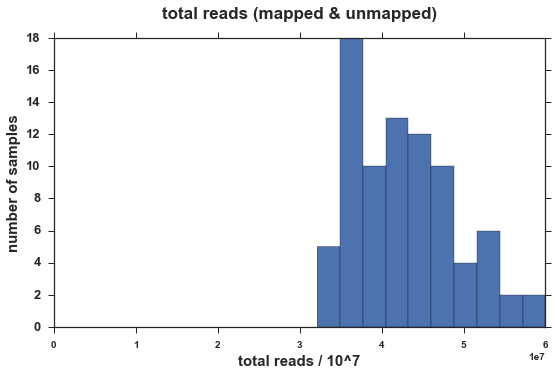

In [19]:
ax = df['total_reads'].plot(kind='hist')
ax.set_xlabel("total reads / 10^7")
ax.set_ylabel("number of samples")
ax.set_title("total reads (mapped & unmapped)", y=1.05)
ax.set_xlim([0, max(df['total_reads'])])
if save_plots:
    ax.figure.savefig(plot_dir+"total_reads_histogram.pdf")

//anaconda/envs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


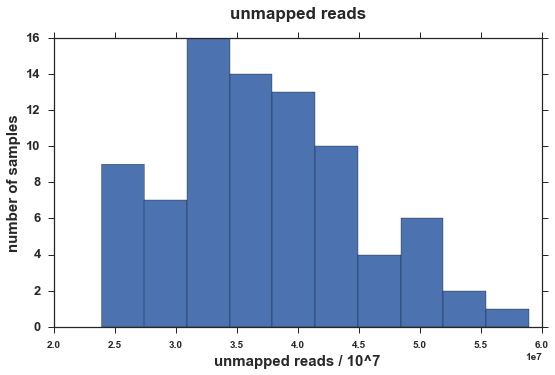

In [20]:
ax = (df['total_reads'] - df['reads_mapped_to_rRNA']).plot(kind='hist')
ax.set_xlabel("unmapped reads / 10^7")
ax.set_ylabel("number of samples")
ax.set_title('unmapped reads', y=1.05)
if save_plots:
    ax.figure.savefig(plot_dir+"unmapped_reads_histogram.pdf")

//anaconda/envs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


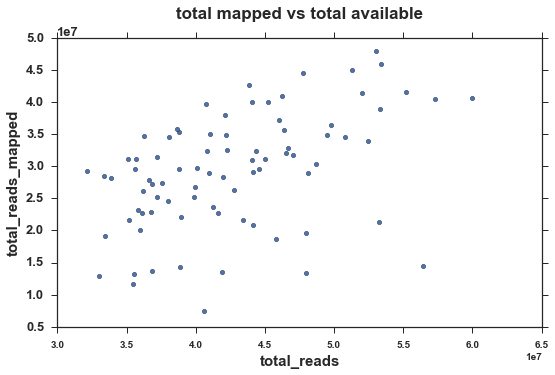

In [21]:
ax = df.plot.scatter(x='total_reads', y='total_reads_mapped')
ax.set_title('total mapped vs total available', y=1.05)

//anaconda/envs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


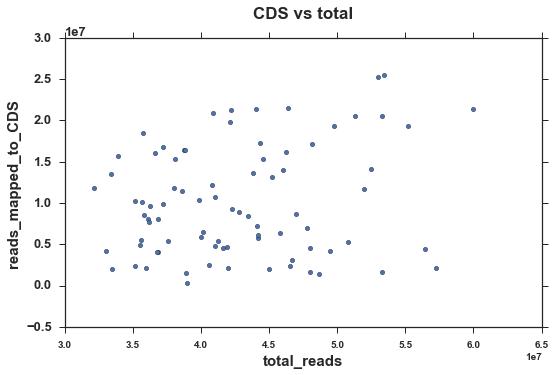

In [22]:
ax = df.plot.scatter(x='total_reads', y='reads_mapped_to_CDS')
ax.set_title('CDS vs total', y=1.05)

//anaconda/envs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


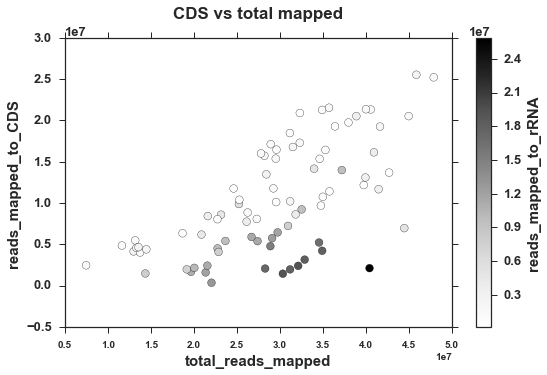

In [23]:
ax = df.plot.scatter(x='total_reads_mapped', 
                     y='reads_mapped_to_CDS', 
                     c='reads_mapped_to_rRNA', s= 60,
                     sharex=False # hack to get back the x label
                     # hack from: https://github.com/pydata/pandas/issues/10611
                    )
ax.set_title('CDS vs total mapped', y=1.05)
plt.tight_layout()
ax.figure.savefig(plot_dir + 'CDS_vs_total_mapped--color_by_rRNA_reads_mapped.pdf')

http://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe

In [24]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']),
        color='silver', fontsize=12)

//anaconda/envs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


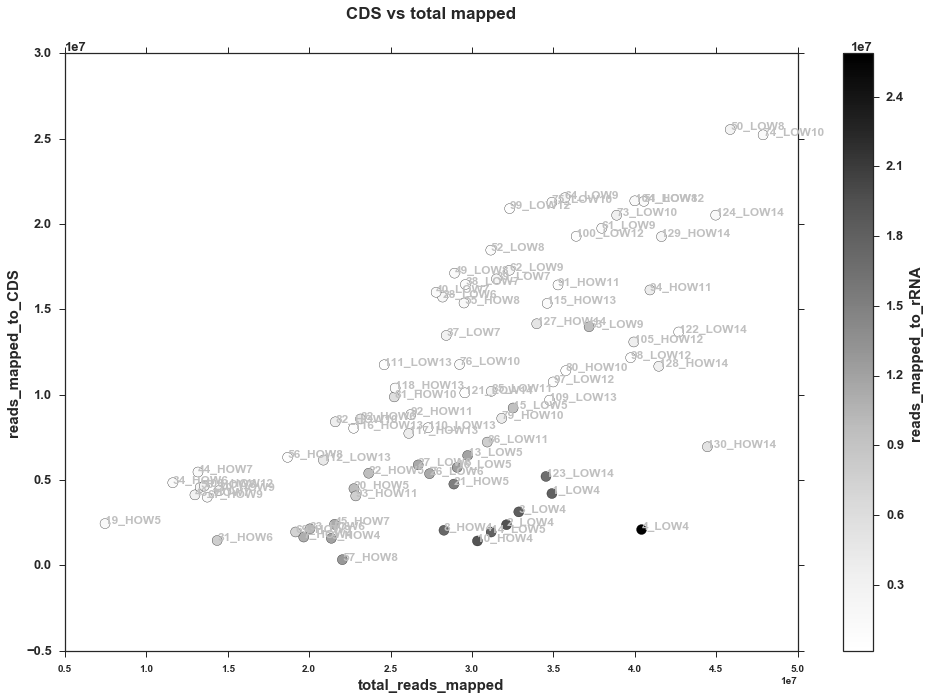

In [25]:
ax = df.plot.scatter(x='total_reads_mapped', 
                     y='reads_mapped_to_CDS', 
                     c='reads_mapped_to_rRNA', s= 100,
                     sharex=False # hack to get back the x label
                     # hack from: https://github.com/pydata/pandas/issues/10611
                    )
ax.set_title('CDS vs total mapped', y=1.05)
ax.figure.savefig(plot_dir + 
                  'CDS_vs_total_mapped--color_by_rRNA_reads_mapped.pdf')
label_point(df.total_reads_mapped, df.reads_mapped_to_CDS, 
            df.ID, ax)
ax.figure.set_size_inches(14, 10)
ax.figure.savefig(plot_dir + 'CDS_vs_total_mapped--color_by_rRNA_reads_mapped--labeled.pdf')

In [26]:
df.head()

,ID,oxygen,replicate,week,project,sample,shortd,total_reads,total_reads_mapped,s.total_reads_mapped / s.total_reads,reads_mapped_to_rRNA,s.reads_mapped_to_rRNA / s.total_reads_mapped,reads_mapped_to_tRNA,s.reads_mapped_to_tRNA / s.total_reads_mapped,reads_mapped_to_CDS,s.reads_mapped_to_CDS / s.total_reads_mapped,reads_mapped_to_hypo,s.reads_mapped_to_hypo / s.total_reads_mapped,CDS_max_hits_per_kb,CDS_mean_hits_per_kb
0,1_LOW4,low,1,4,1056013,LakWasMeta1_LOW4_2,LakWasMeta1_LOW4_2,49467855,34913644,0.7058,18052199,0.5171,3244,0.0001,4212642,0.1207,463270,0.0133,755669,33.8984
1,13_LOW5,low,1,5,1056037,LakWasMet13_LOW5_2,LakWasMet13_LOW5_2,40105612,29735707,0.7414,11809949,0.3972,6779,0.0002,6439789,0.2166,799935,0.0269,993211,53.3784
2,37_LOW7,low,1,7,1056085,LakWasMet37_LOW7_2,LakWasMet37_LOW7_2,33363991,28420269,0.8518,2993615,0.1053,5624,0.0002,13473120,0.4741,1212334,0.0427,2740460,99.3911
3,49_LOW8,low,1,8,1056109,LakWasMet49_LOW8_2,LakWasMet49_LOW8_2,48116830,28931614,0.6013,1356581,0.0469,8572,0.0003,17123824,0.5919,1735830,0.0600,2848280,124.2090
4,61_LOW9,low,1,9,1056133,LakWasMet61_LOW9_2,LakWasMet61_LOW9_2,42124631,37974206,0.9015,830569,0.0219,16935,0.0004,19753275,0.5202,2251523,0.0593,2915610,154.0810


In [27]:
df.columns

Index(['ID', 'oxygen', 'replicate', 'week', 'project', 'sample', 'shortd',
       'total_reads', 'total_reads_mapped',
       's.total_reads_mapped / s.total_reads', 'reads_mapped_to_rRNA',
       's.reads_mapped_to_rRNA / s.total_reads_mapped', 'reads_mapped_to_tRNA',
       's.reads_mapped_to_tRNA / s.total_reads_mapped', 'reads_mapped_to_CDS',
       's.reads_mapped_to_CDS / s.total_reads_mapped', 'reads_mapped_to_hypo',
       's.reads_mapped_to_hypo / s.total_reads_mapped', 'CDS_max_hits_per_kb',
       'CDS_mean_hits_per_kb'],
      dtype='object')

//anaconda/envs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


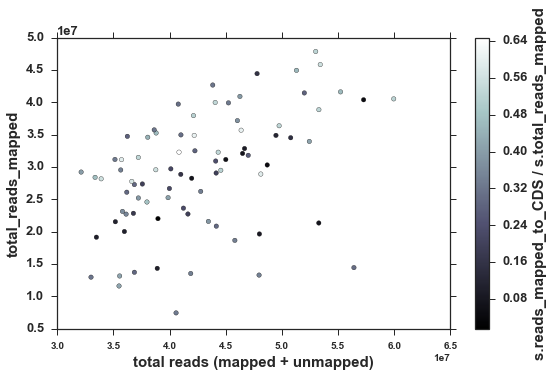

In [28]:
# s.total_reads_mapped / s.total_reads
#my_cmap = (matplotlib.color.LinearSegmentedColormap.
#        from_list('blueWhiteRed', ['blue', 'white', 'red']))

ax = df.plot.scatter(x='total_reads', y='total_reads_mapped', 
                     c='s.reads_mapped_to_CDS / s.total_reads_mapped',
                    cmap=plt.cm.bone,
                    sharex=False # hack to get back the x label
                     # hack from: https://github.com/pydata/pandas/issues/10611
                    )
#ax.set_title('CDS vs mapped')
ax.set_xlabel('total reads (mapped + unmapped)')
ax.figure.savefig(plot_dir + 
                  'total_mapped_vs_total--color_by_frac_to_CDS.pdf')

In [36]:
df["ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''"]

KeyError: "ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''"

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

//anaconda/envs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


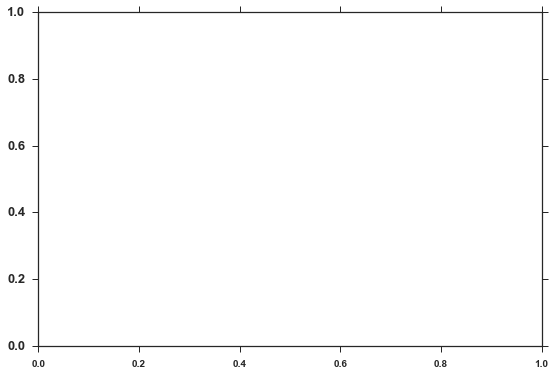

In [35]:
# s.total_reads_mapped / s.total_reads
#my_cmap = (matplotlib.color.LinearSegmentedColormap.
#        from_list('blueWhiteRed', ['blue', 'white', 'red']))

ax = df.plot.scatter(x='total_reads', y='total_reads_mapped', 
                     c='s.reads_mapped_to_CDS / s.total_reads_mapped',
                    cmap=plt.cm.bone,
                     s='s.reads_mapped_to_rRNA / s.total_reads_mapped',
                    sharex=False # hack to get back the x label
                     # hack from: https://github.com/pydata/pandas/issues/10611
                    )
label_point(df.total_reads, df.total_reads_mapped, 
            df.ID, ax)
ax.figure.set_size_inches(14, 10)
#ax.figure.savefig(plot_dir + 
#                  'total_mapped_vs_total--color_by_frac_to_CDS--labeled.pdf')

In [ ]:
# s.total_reads_mapped / s.total_reads
#my_cmap = (matplotlib.color.LinearSegmentedColormap.
#        from_list('blueWhiteRed', ['blue', 'white', 'red']))

ax = df.plot.scatter(x='total_reads', y='total_reads_mapped', 
                     c='s.reads_mapped_to_CDS / s.total_reads_mapped',
                    cmap=plt.cm.bone,
                     s=100,
                    sharex=False # hack to get back the x label
                     # hack from: https://github.com/pydata/pandas/issues/10611
                    )
label_point(df.total_reads, df.total_reads_mapped, 
            df.ID, ax)
ax.figure.set_size_inches(14, 10)
ax.figure.savefig(plot_dir + 
                  'total_mapped_vs_total--color_by_frac_to_CDS--labeled.pdf')

//anaconda/envs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


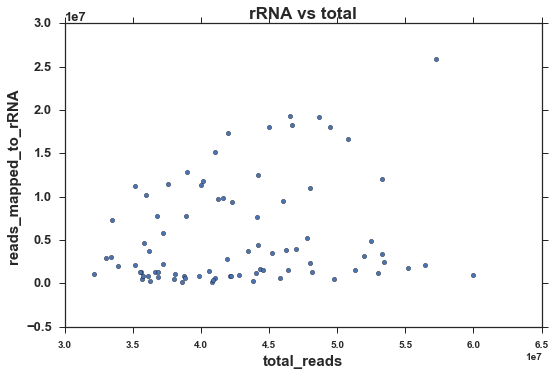

In [30]:
ax = df.plot.scatter(x='total_reads', y='reads_mapped_to_rRNA')
ax.set_title('rRNA vs total')

//anaconda/envs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


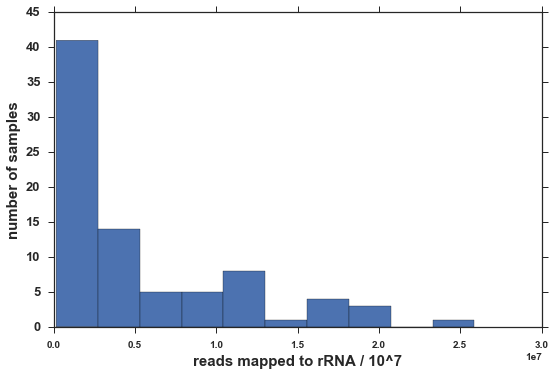

In [31]:
ax = df['reads_mapped_to_rRNA'].plot(kind='hist')
ax.set_xlabel("reads mapped to rRNA / 10^7")
ax.set_ylabel("number of samples")

//anaconda/envs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


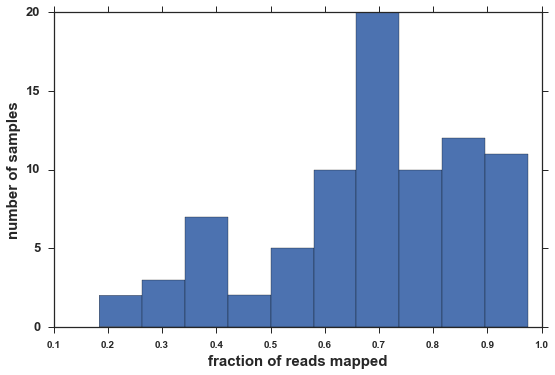

In [32]:
ax = df['s.total_reads_mapped / s.total_reads'].plot(kind='hist')
ax.set_xlabel("fraction of reads mapped")
ax.set_ylabel("number of samples")